[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Hypothesis%20Testing/Python/Exact%20Binomial%20Test.ipynb)

# Definitions

The exact binomial test is a test of the statistical significance of a null hypothesis about the probability of success of a series of [Bernoulli trials](https://colab.research.google.com/drive/1h5EoxuqTrJGylVdRNCo0MzRPkr2JE_cH?usp=sharing), which are individual binary outcomes that each have a success probability of *p* (also called $\pi$). For example, if you flip a coin 10 times, what is the probability that it will come up heads 0, 1, 2, ... 10 times? Here we focus on the more common, one-sample version of this test, which uses a frequentist approach to determine the probability (i.e., the *p*-value) that you would have obtained your data given a null hypothesis that specifies a particular value of the probability, *p*, used to parameterize the [binomial distribution](https://colab.research.google.com/drive/1q1KaEjkAzUKRFSLPQ0SFdqU_byc70Oi2?usp=sharing).

To use this test:

1\. **Specify the Null ($H_0$) and Alternative ($H_1$) hypotheses**.

2\. **Determine the appropriate test statistic**. In this case, it is just the number of successes (*k*) in the n Bernoulli trials that you tested.

3\. **Determine the probability distributions of the statistic under the chance model, as determined by the Null Hypothesis**. In this case, we assume that the number of successes is distributed according to the binomial distribution, given a Null Hypothesis about the value of p; i.e., $H_0: p=$ a particular value.

4\. **Compare the observed statistic to its distribution under the chance model to determine the strength of evidence, or *p*-value**. That is, determine the probability of obtaining the measured value of *k* (or any value greater than or equal to *k*, or less than or equal to *k*, depending on the question you are asking), given the binomial distribution computed using the assumed value of *p* and the same value of *n* that was used in the experiment. 


# Getting started with code

Matlab code is found [here](https://github.com/PennNGG/Quantitative-Neuroscience/blob/master/Hypothesis%20Testing/Matlab/ExactBinomialTest.m)

Python code is included below. First run the code cell just below to make sure all of the required Python modules are loaded, then you can run the other cell(s).

In [ ]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

# Neuroscience example: Progression of symptoms in Alzheimer's Disease

Godbolt, A.K., et al (2004). [The Natural History of Alzheimer Disease: A Longitudinal Presymptomatic and Symptomatic Study of a Familial Cohort](https://pubmed.ncbi.nlm.nih.gov/15534185/). 

This study aimed to characterize the progression of cognitive deficits in familial Alzheimer's disease. It is of interest here because, as noted in the Abstract, "The relative timing of the occurrence of 3 markers of disease onset and progression (onset of symptoms, Mini-Mental State Examination score ≤ 24, and impaired scores on a range of neuropsychological tests) were compared using the binomial exact test."

## Exercise 1

### Questions

1\. What was the objective of the study? 

2\. What was the population being studied?

3\. What was the sample that they used to make inferences about properties of the population?

4\. What data did they obtain from this sample?

5\. Are the data best described as continuous, categorical, or binary?

6\. What hypotheses were they testing using the "binomial exact test"? (note: this is the same as the "exact binomial test)

### Answers

1\. The objective was "To delineate the onset and progression of clinical and neuropsychological abnormalities in familial Alzheimer disease."

2\. The population being studied was all people with familial Alzheimer's disease, or possibly all people likely to have the disease now or some time in the future. 

3\. The sample is described in the Abstract: "Nineteen subjects with familial Alzheimer disease underwent serial clinical and neuropsychological assessments. Eight of these had undergone presymptomatic assessments." 

4\. Data: "Neuropsychological tests assessed intellectual functioning, current (Wechsler Adult Intelligence Scale Revised) and premorbid (National Adult Reading Test); verbal and visual recognition memory (Recognition Memory Test for Words and Faces); naming (Graded Naming Test); spelling (Oral Graded Difficulty Spelling Test); calculation (Graded Difficulty Arithmetic Test); and visuospatial and perceptual abilities (cube analysis and silhouettes from the Visual Object and Space Perception Battery)."

5\. The data were continuous but converted to binary values (0=not imparied, 1=impaired) for further analyses: "For all cognitive domains except intelligence, raw scores were converted into percentiles, referring to published normative data. Scores at or below the fifth percentile were taken to indicate an impairment. For intelligence, a difference of 10 or greater between the National Adult Reading Test and the performance or verbal IQ was considered an impairment."

6\. They used the binomial exact test to compare "The relative timing of the occurrence of 3 markers of disease onset and progression (onset of  symptoms, Mini-Mental State Examination score ? 24, and impaired scores on a range of neuropsychological tests)"

## Exercise 2

### Questions

Consider the first entry of Table 2. 

1\. What do the two numbers represent? 

2\. How do these numbers relate to the parameters of a binomial distribution (*n*, *k*, and *p*)?

3\. What is being tested? 

4\. What is the Null Hypothesis? 

5\. What are the values of the binomial distribution under the Null Hypothesis? How well can you simulate the distribution using 10 coin flips? 100? 1000? 10000?

6\. How is the *p*-value (0.29) obtained? Why is it not just the probability of *k* successes in *n* trials given the Null Hypothesis on *p*?

### Answers

1\. Of 8 total patients, 6 showed deficits on the Recognition Memory Test - Words (RMT-W) before they were diagnosed with clinical onset of the disease as estimated by the year of the initial symptoms; 2 were diagnosed before showing RMT-W deficits.

2\. 

*n* = the number of "trials" (a generic term indiating the number of independent observations), which here is the number of patients = 6 + 2 = 8

*k* = the number of "successes" (another generic term indicating the number of times that one of the independent observations had a particular binary outcome), which here is the number of patients with a particular deficit/event occurring first = either 6 or 2 (the fact that we can consider either alternative will be very important soon)

*p* = the unknown, actual probability in the population that governs how often one deficit/event will occur first in a given individual with familial Alzheimer's Disease. Note that this "p" is different than the "p-value" we will obtain from the statistical test (both are probabilities, but they relate to different things).

3\. They are testing whether one or the other deficits/events occurred  before the other in a statistially reliable or "significant" manner. Again, note that the general form of this test (which is the one they consider) is that either order might occur.

4\. The Null Hypothesis is that neither deficit/event is more likely to  occur before or after the other. In terms of the binomial distribution, this hypothesis is equivalent to saying that the underlying probability that governs whether one occurs first is equal to 0.5, or "$H_0: p=0.5$".

5\. See code cell below.

6\. Here we are testing the probability that we would get at least the given number of "successes" if we assume that *p*=0.5. Because we did not define in advance the temporal ordering of the deficits/events we were testing, we are doing a "two-tailed" test: what is the probability that we would get at least 6 patients with RMT-W deficits appearing before clinical diagnosis onset, OR at least 6 patients with RMT-W deficits appearing after clinical diagnosis onset. By definition of the [bionmoial distribution](https://colab.research.google.com/drive/1q1KaEjkAzUKRFSLPQ0SFdqU_byc70Oi2?usp=sharing), this probability is just the sum of the probabilities associated with $X=0$ (i.e., 0 successes, 8 failures; or 8 times out of 8 patients that one of the events/deficits always happened first), $X=1, X=2, X=6, X=7$, and $X=8$.
Specifically (from the probability distribution above):

$p = 0.0039 + 0.0313 + 0.1094 + 0.1094 + 0.0313 + 0.0039 = 0.2892$

k=0: p(true)=0.0039, p(N=10)=0.0000, p(N=100)=0.0000, p(N=1000)=0.0050, p(N=10000)=0.0041
k=1: p(true)=0.0313, p(N=10)=0.0000, p(N=100)=0.0300, p(N=1000)=0.0250, p(N=10000)=0.0329
k=2: p(true)=0.1094, p(N=10)=0.3000, p(N=100)=0.0700, p(N=1000)=0.1090, p(N=10000)=0.1014
k=3: p(true)=0.2188, p(N=10)=0.0000, p(N=100)=0.2100, p(N=1000)=0.2290, p(N=10000)=0.2238
k=4: p(true)=0.2734, p(N=10)=0.1000, p(N=100)=0.2400, p(N=1000)=0.2880, p(N=10000)=0.2821
k=5: p(true)=0.2188, p(N=10)=0.2000, p(N=100)=0.2700, p(N=1000)=0.2020, p(N=10000)=0.2166
k=6: p(true)=0.1094, p(N=10)=0.3000, p(N=100)=0.1300, p(N=1000)=0.1140, p(N=10000)=0.1053
k=7: p(true)=0.0313, p(N=10)=0.1000, p(N=100)=0.0500, p(N=1000)=0.0230, p(N=10000)=0.0293
k=8: p(true)=0.0039, p(N=10)=0.0000, p(N=100)=0.0000, p(N=1000)=0.0050, p(N=10000)=0.0045


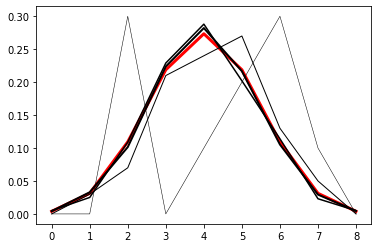

In [ ]:
# Answer to Question 5

# True pmf
n = 8                       # Number of patients
p_H0 = 0.5                  # Null Hypothesis: p=0.5
k = np.arange(n+1)          # Possible values of k (measured events)
probs = binom.pmf(k,n,p_H0) # Array of probabilities of obtaining those values of k, given n and prelease

# Now simulate using 10, 100, 1000, 10000 trials
counts_list = []
for a in np.arange(1, 5):
  N = int(10**a)
  r = binom.rvs(n, p_H0, size=N)
  counts, edges = np.histogram(r, bins=np.arange(-0.5,n+1.5))
  probs = np.column_stack((probs, counts/N))

# Print it nicely
for A, B in zip(k, probs):
    print(f'k={A:1d}: p(true)={B[0]:.4f}', end='')
    [print(f', p(N={10**(ind+1)})={x:.4f}', end='') for ind, x in enumerate(B[1:])]
    print('')

# Plot it
plt.plot(k, probs.T[0], 'r-', linewidth=3)
[plt.plot(k, probs[:,x], 'k-', linewidth=x/2) for x in np.arange(1,5)]
plt.show()

## Exercise 3

### Questions

Consider the row labeled "MMSE" in Table 2.

1\. The timing of the onset of symptoms according to MMSE (the Mini-Mental State Examination) is compared to how many different deficit onset times?

2\. In the first column, this comparison (MMSE vs onset) involves 8 people. If we assume a Null Hypothesis of p=0.5 (i.e., it is equally likely that a deficit on the MMSE or disease onset will occur first), what is the probability of obtaining either most extreme outcome (all 8 first show a deficit on the MMSE, or all 8 first are diagnosed with the disease)?

3\. In the second column, this comparison (MMSE vs RMT-W) involves 6 people. If we assume a Null Hypothesis of p=0.5, what is the probability of obtaining either most extreme outcome?

4\. What is the probability of obtaining any one of the most extreme outcomes associated with the first two columns? Hint: if A and B are independent (assume they are in this case), the probability of event A or event B happening is equal to one minus the probability that both did not happen.

5\. What is the probability of obtaining an extreme outcome in any of the comparisons with MMSE, assuming the Null Hypothesis in each case?

6\. What about for the bottom row?

### Answers

In [ ]:
# 1. 5 (the first five columns)

# 2. This is the given p-value from above:
print(f'2. p={probs[0,0]+probs[0,-1]:.4f}')

# 3. p = 0.0313
print(f'3. p={binom.pmf([0, 6], 6, 0.5).sum():.4f}')

# 4. p = 1 - (no extreme in first comparison) * (no extreme in second comparison)
#      = 0.0388
p1 = binom.pmf([0, 8], 8, 0.5).sum()
p2 = binom.pmf([0, 6], 6, 0.5).sum()
print(f'4. p={1-(1-p1)*(1-p2):.4f}')

# 5. p = 1 - prod(no extreme in each comparison)
#      = 0.0832
print(f'5. p={1-(1-binom.pmf(0, [8,6,7,7,7], 0.5)*2).prod():.4f}')

# 6. p = 0.2820
print(f'6. p={1-(1-binom.pmf(0, [14,14,12,14,13,11,10,8,6,3], 0.5)*2).prod():.4f}')

2. p=0.0080
3. p=0.0313
4. p=0.0388
5. p=0.0832
5. p=0.2820


For question 6, perhaps you can see that there is a problem here: even under the Null Hypothesis that no event is likely to occur before any other, it becomes increasingly likely that by chance you'll get one of the comparisons to show up as an extreme case. This is the [multiple comparisons](https://colab.research.google.com/drive/1AmfvDhhfviRQFvONiUVUba_6hof8RDp6?usp=sharing) problem.

# Additional Resources


TO DO



# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania